In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:
walmart_df = pd.read_csv("Walmart.csv")
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [28]:
for x in range(1, 46):
    globals()[f'Store{x}_df'] = walmart_df[walmart_df['Store'] == x]

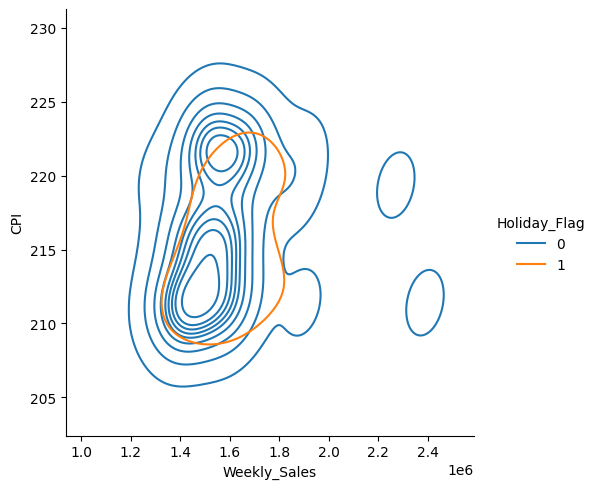

In [23]:
sns.displot(Store1_df, x="Weekly_Sales", y="CPI", hue="Holiday_Flag", kind="kde")

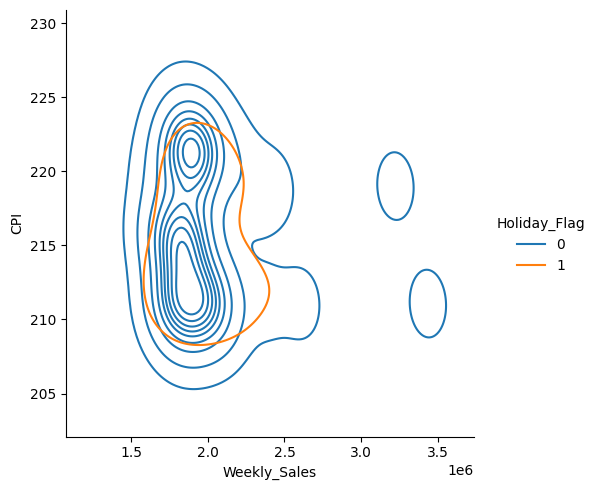

In [24]:
sns.displot(Store2_df, x="Weekly_Sales", y="CPI", hue="Holiday_Flag", kind="kde")

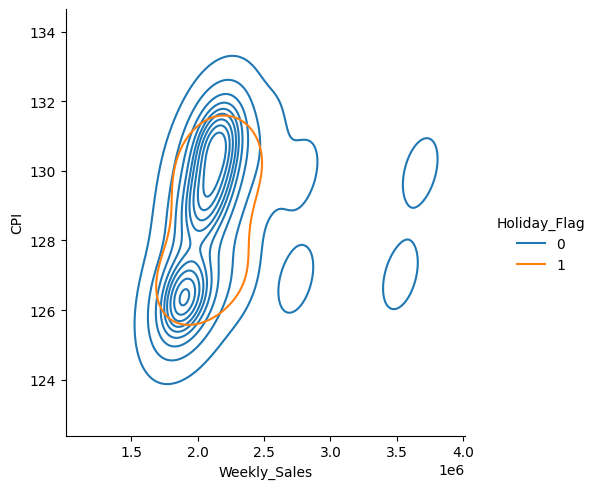

In [36]:
sns.displot(Store4_df, x="Weekly_Sales", y="CPI", hue="Holiday_Flag", kind="kde")

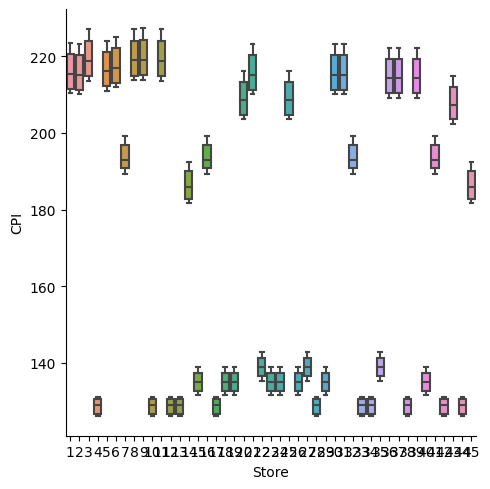

In [33]:
sns.catplot(data=walmart_df, x="Store", y="CPI", kind="box")
plt.show()